In [62]:
import os
import sys

# set the working dir to the parent working dir
current_working_dir = os.getcwd()
print(f'Previous working dir: {current_working_dir}')
new_working_dir = current_working_dir.replace('notebooks', '')
os.chdir(new_working_dir)
sys.path.insert(0, new_working_dir)
print(f'Current working dir: {os.getcwd()}')

Previous working dir: /home/albert/PycharmProjects/mnist_shuffle
Current working dir: /home/albert/PycharmProjects/mnist_shuffle


In [63]:
import numpy as np 
import struct

images_path = '/home/albert/data/MNIST/train-images.idx3-ubyte'

with open(images_path, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
    images = np.fromfile(imgpath, dtype=np.uint8).reshape(-1, 28, 28)

In [64]:
tops, bottoms = list(zip(*[(image[:14], image[14:]) for image in images]))
top_indices = list(range(len(tops)))
bottom_indices = list(range(len(bottoms)))
np.random.shuffle(bottom_indices)

tops = np.array([tops[top_index] for top_index in top_indices])
bottoms = np.array([bottoms[bottom_index] for bottom_index in bottom_indices])

## Calculate mean and std

In [65]:
image_flat = np.reshape(images, [-1, 784])
top_flat = np.reshape(tops, [-1, 392])
bottom_flat = np.reshape(bottoms, [-1, 392])

image_mean = np.mean(np.mean(image_flat, -1))
image_std = np.mean(np.std(image_flat, -1))

top_mean = np.mean(np.mean(top_flat, -1))
top_std = np.mean(np.std(top_flat, -1))

bottom_mean = np.mean(np.mean(bottom_flat, -1))
bottom_std = np.mean(np.std(bottom_flat, -1))

print(f'The image mean: {image_mean}, and std: {image_std}\n' \
      f'The top mean: {top_mean}, and std: {top_std}\n' \
      f'The bottom mean: {bottom_mean}, and std: {bottom_std}')

The image mean: 33.318421449829934, and std: 76.83453865617214
The top mean: 31.30753307823129, and std: 74.60034643235738
The bottom mean: 35.32930982142857, and std: 78.54682398367856


## Checking the derivative of the middle line in original and shuffled images

conclusion: there is a distribution difference, but no significant separation: it can't be used for prediction

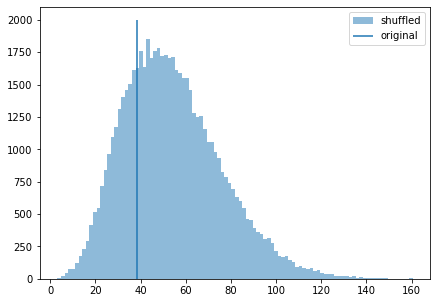

In [105]:
import matplotlib.pyplot as plt

i = 0

original_derivatives = [np.mean(np.abs(image[13]-image[14])) for image in images][i]

top = np.expand_dims(tops[i], 0)

shuffled_derivates = np.mean((top[:, -1] - bottoms[:, 0]), -1)

# # plot
fig = plt.figure(figsize=[7, 5])
plt.hist(shuffled_derivatives, bins=100, alpha=0.5, label='shuffled')
plt.vlines(original_derivatives, 0, 2000, label='original')
plt.legend(loc='upper right')
plt.show()

## Checking the pixel value sum difference in the middle lines of the original and shuffled images

conclusion: there is a distribution difference, but no significant separation: it can't be used for prediction

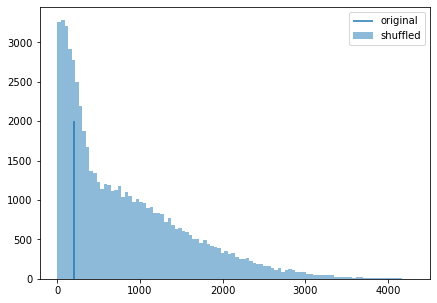

In [135]:
i = 0

original_sums = [np.abs(np.sum(image[13].astype(float))-np.sum(image[14].astype(float))) for image in images][i]

original_sums

top = np.expand_dims(tops[i], 0)


shuffled_sums = np.abs(np.sum(top[:, -1].astype(float), -1, keepdims=True) - np.sum(bottoms[:, 0].astype(float), -1, keepdims=True))

# # # plot
# fig = plt.figure(figsize=[7, 5])
# plt.hist(shuffled_derivatives, bins=100, alpha=0.5, label='shuffled')
# plt.legend(loc='upper right')
# plt.show()

# original_derivatives = [np.abs(np.sum(image[13]).astype(float)-np.sum(image[14]).astype(float))
#                         for image in images]
# shuffled_derivatives = [np.abs(np.sum(top[-1]).astype(float) - np.sum(bottom[0]).astype(float))
#                                 for top, bottom in zip(tops, bottoms)]


# # plot
fig = plt.figure(figsize=[7, 5])
plt.vlines(original_sums, 0, 2000, label='original')
plt.hist(shuffled_sums, bins=100, alpha=0.5, label='shuffled')
plt.legend(loc='upper right')
plt.show()